In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pickle

In [7]:
from sklearn.calibration import calibration_curve

In [5]:
with open('/home/walml/Downloads/df_spec_classprobs.pkl', 'rb') as f:
    df = pickle.load(f)

In [6]:
df

,bossprimary,sdssprimary,specObjID,objid,Column1,mjd,plate,fiberID,run2d,ra,...,w2err,w3err,w4err,resolvedr,feature_1D,class_pred,prob_g,prob_q,prob_s,prob_best
0,1,0,4.320248e+18,1237648722835538627,4.320248e+18,55572,3837,619,v5_10_0,166.726450,...,0.131,9999.000,9999.000,0.98622,-4.366548,NaN,NaN,NaN,NaN,NaN
1,1,0,5.337947e+18,1237648722835734721,5.337947e+18,55704,4741,203,v5_10_0,167.128300,...,0.045,0.170,0.214,0.91533,0.598849,NaN,NaN,NaN,NaN,NaN
2,0,1,5.730867e+17,1237648722836062366,5.730867e+17,52374,509,13,26,167.963190,...,0.055,0.487,9999.000,1.09256,3.042845,GALAXY,1.00,0.00,0.0,1.00
3,0,1,3.142498e+17,1237648722836521258,3.142498e+17,51984,279,450,26,169.003260,...,0.044,9999.000,9999.000,1.10386,0.218124,NaN,NaN,NaN,NaN,NaN
4,0,1,3.142729e+17,1237648722836586541,3.142729e+17,51984,279,534,26,169.164000,...,0.031,0.032,0.149,1.39071,4.743540,GALAXY,1.00,0.00,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237997,1,0,4.902186e+18,1237672796106195292,4.902186e+18,55810,4354,65,v5_10_0,1.257021,...,0.111,0.133,0.181,1.15950,-2.299720,GALAXY,0.68,0.32,0.0,0.68
3237998,1,0,7.685411e+18,1237651067892990333,7.685411e+18,56449,6826,66,v5_10_0,201.320300,...,0.076,0.209,9999.000,0.02016,-1.661871,NaN,NaN,NaN,NaN,NaN
3237999,1,0,4.801042e+18,1237670014583767642,4.801042e+18,55506,4264,745,v5_10_0,35.042884,...,0.093,9999.000,9999.000,0.82624,-1.653507,GALAXY,1.00,0.00,0.0,1.00
3238000,1,0,5.695933e+18,1237669698912846246,5.695933e+18,56190,5059,20,v5_10_0,342.716090,...,0.066,9999.000,9999.000,1.07928,-1.477026,GALAXY,1.00,0.00,0.0,1.00


In [10]:
df.columns.values

array(['bossprimary', 'sdssprimary', 'specObjID', 'objid', 'Column1',
       'mjd', 'plate', 'fiberID', 'run2d', 'ra', 'dec', 'z', 'z_noqso',
       'zErr_noqso', 'class', 'programname', 'instrument', 'survey',
       'scienceprimary', 'zwarning', 'boss_target1', 'eboss_target1',
       'snmedian', 'match_dist', 'cmod_u', 'cmod_g', 'cmod_r', 'cmod_i',
       'cmod_z', 'cmoderr_u', 'cmoderr_g', 'cmoderr_r', 'cmoderr_i',
       'cmoderr_z', 'psf_u', 'psf_g', 'psf_r', 'psf_i', 'psf_z',
       'psferr_u', 'psferr_g', 'psferr_r', 'psferr_i', 'psferr_z',
       'ext_u', 'ext_g', 'ext_r', 'ext_i', 'ext_z', 'w1', 'w2', 'w3',
       'w4', 'w1err', 'w2err', 'w3err', 'w4err', 'resolvedr',
       'feature_1D', 'class_pred', 'prob_g', 'prob_q', 'prob_s',
       'prob_best'], dtype=object)

In [11]:
df['class']

0          GALAXY
1             QSO
2          GALAXY
3          GALAXY
4          GALAXY
            ...  
3237997    GALAXY
3237998       QSO
3237999    GALAXY
3238000    GALAXY
3238001    GALAXY
Name: class, Length: 3099457, dtype: object

In [33]:
df['class'].value_counts()

GALAXY    2209333
STAR       512236
QSO        377888
Name: class, dtype: int64

In [37]:
df['class_pred']

0             NaN
1             NaN
2          GALAXY
3             NaN
4          GALAXY
            ...  
3237997    GALAXY
3237998       NaN
3237999    GALAXY
3238000    GALAXY
3238001       NaN
Name: class_pred, Length: 3099457, dtype: object

In [38]:
def show_calibration(df, n_bins=15):
    prob_true, prob_pred = calibration_curve(df['class'] == 'GALAXY', df['prob_g'], n_bins=n_bins)
    plt.plot(prob_pred, prob_true, marker='.', label='Galaxy')

    prob_true, prob_pred = calibration_curve(df['class'] == 'STAR', df['prob_s'], n_bins=n_bins)
    plt.plot(prob_pred, prob_true, marker='.', label='STAR')

    prob_true, prob_pred = calibration_curve(df['class'] == 'QSO', df['prob_q'], n_bins=n_bins)
    plt.plot(prob_pred, prob_true, marker='.', label='QSO')

    plt.plot((0, 1), (0, 1), 'k--', alpha=.5)
    plt.xlabel('Predicted p')
    plt.ylabel('Actual p')
    plt.legend()

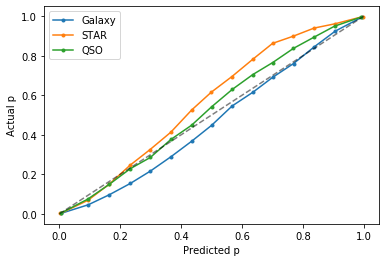

In [39]:
show_calibration(df)

In [41]:
pd.isnull(df['class_pred'])

0           True
1           True
2          False
3           True
4          False
           ...  
3237997    False
3237998     True
3237999    False
3238000    False
3238001     True
Name: class_pred, Length: 3099457, dtype: bool

In [44]:
len(df[~pd.isnull(df['class_pred'])]), len(df[pd.isnull(df['class_pred'])])

(1549729, 1549728)

In [ ]:
# no need to split out training, already have nan predictions, nice

In [46]:
# show_calibration(df[pd.isnull(df['class_pred'])])

In [47]:
# show_calibration(df[~pd.isnull(df['class_pred'])])